Ce notebook sert de template pour l’analyse et le plot de données pour l’agregation

In [1]:
import data_analysis as da
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
# Fonction affine pour le fit
def poly(x):
    return x**1.2001333

Température en fonction de la résistance d’un fil de tungstène
Lien : https://www.semanticscholar.org/paper/Resistance-and-Radiation-of-Tungsten-as-a-Function-Forsythe-Watson/84fdeb704a4781a6dcf84586502f0d287449e814
Source publication : http://www.lababerto.if.usp.br/uploads/Main/ArtigosCientificos/tung.pdf

In [3]:
T = np.array(    [
        273.0,
        293.0,
        300.0,
        400.0,
        500.0,
        600.0,
        700.0,
        800.0,
        900.0,
        1000.0,
        1100.0,
        1200.0,
        1300.0,
        1400.0,
        1500.0,
        1600.0,
        1700.0,
        1800.0,
        1900.0,
        2000.0,
        2100.0,
        2200.0,
        2300.0,
        2400.0,
        2500.0,
        2600.0,
        2700.0,
        2800.0,
        2900.0,
        3000.0,
    ]
)

rho = np.array(    [
        5.05,
        5.50,
        5.65,
        8.00,
        10.48,
        13.07,
        15.75,
        18.51,
        21.35,
        24.26,
        27.23,
        30.26,
        33.29,
        36.37,
        39.50,
        42.67,
        45.88,
        49.12,
        52.40,
        55.71,
        59.05,
        62.42,
        65.82,
        69.25,
        72.71,
        76.20,
        79.71,
        83.25,
        86.81,
        90.40,
    ]
)

a = 1.2001333

In [4]:
# Lecture des données
file_path = "data.txt"  # Remplacez par le chemin correct si nécessaire
df = da.loadfile(file_path)
df

Délimiteur détecté : '	'
Fichier chargé avec succès : data.txt


U       I  T_pyro         P
0    74.3  0.0590    1305   4.38370
1    85.1  0.0628    1410   5.34428
2    97.1  0.0668    1520   6.48628
3   104.4  0.0688    1582   7.18272
4   114.5  0.0718    1661   8.22110
5   125.2  0.0755    1750   9.45260
6   133.6  0.0777    1815  10.38072
7   144.7  0.0807    1894  11.67729
8   156.5  0.0838    1976  13.11470
9   162.7  0.0852    2018  13.86204
10  176.7  0.0894    2100  15.79698
11  182.4  0.0903    2140  16.47072
12  194.1  0.0933    2209  18.10953
13  209.3  0.0973    2290  20.36489
14  221.3  0.0998    2353  22.08574
15  238.6  0.1038    2440  24.76668

Ajustement entre 5.947946604598115 et 6.449348433140021 : y = ax + b
a = 3.4624427558337403
b = -19.144074874079756
chi2 / (N - p) = 0.07142857142857142
Temps d'exécution : 0.05 secondes


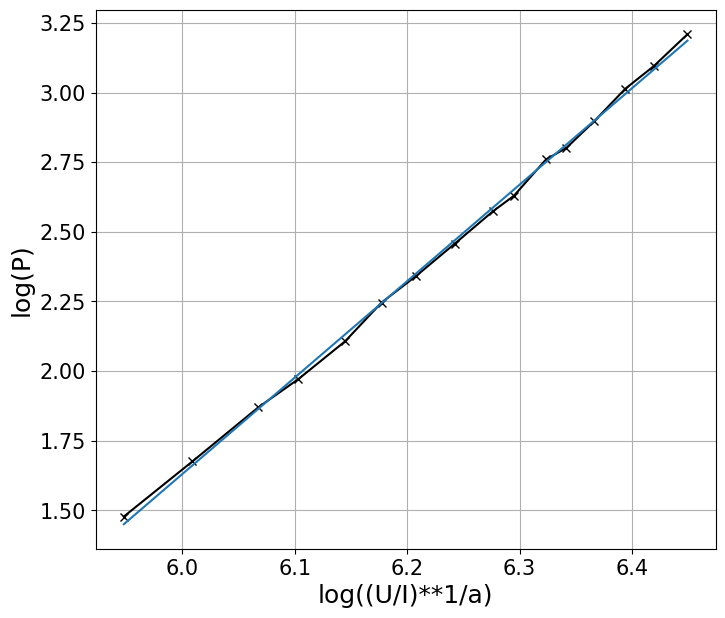

In [5]:
fig, ax = da.make_fig(labelx="log((U/I)**1/a)", labely="log(P)")  # Fabrique une figure avec i, j
#ax.set_xscale("log")
#ax.set_yscale("log")

x = (df["U"]/df["I"])**(1/a)

fit = da.regression(x=np.log(x),y=np.log(df["P"]),ax=ax,model="affine")
#da.plot(x=x, y=df["P"],ax=ax)

In [8]:
fig2,ax2 = da.make_fig(labelx="T4", labely="P")

fit_sigma = da.regression(x= (df["T_pyro"]+273.15)**4, y=df["P"],ax=ax2,xmin=1e13)

Ajustement entre 10000000000000.0 et 54187014018505.65 : y = ax + b
a = 4.148491790992788e-13
b = 2.4169957578697128
chi2 / (N - p) = 0.08333333333333333
Temps d'exécution : 0.00 secondes


In [12]:
sigma = 5.67e-8
ef = 0.2
S = fit_sigma["a"]/(sigma*ef)

d = (2*S)/(np.pi*4e-2)
print(d)

0.0005822336639441376
